In [30]:
#程式碼取自 博碩, "Python 機器學習", ISBN 978-986-434-140-5, by Sebastian Raschka, 為練習Python函式庫用途
#僅供履歷作品集使用
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoid',
                  'Nonflavanoid phenols', 'proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True,
                             bootstrap_features=False, n_jobs=1, random_state=1)
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.833


In [32]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.896


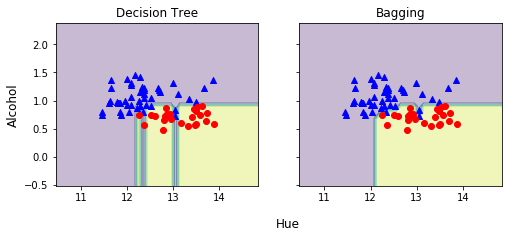

In [33]:
import numpy as np
import matplotlib.pyplot as plt
x_min = X_train[:,0].min() -1
x_max = X_train[:,0].max() +1
y_min = X_train[:,1].min() -1
y_max = X_train[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min, x_max,0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8,3))
for idx, clf, tt in zip([0,1],[tree,bag],['Decision Tree', 'Bagging']):
    clf.fit(X_train,y_train)
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,Z,alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='red',marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2,-1.2,s='Hue', ha='center', va='center',fontsize=12)
plt.show()